# Data Analysis without Pandas

### Background

    We have been asked to analyze a future population growth dataset. We have been asked, by our stakeholders, to analyze the relative percent change of the population of the top 5 countries and the bottom 5 countries. 

### Import Packages

In [4]:
## run this cell without changes

import csv 
import matplotlib.pyplot as plt

### Import the Data

In [5]:
# read the data with csv package into a list called population_data
population_data = []

with open(r'C:\Users\fredv\coding\SavvyCoders\dap-curriculum\Section05\5.1-class\5.1-projected_population_data.csv', 'r') as file:
    csv_reader = csv.reader(file, delimiter=',')

    for row in csv_reader:
        population_data.append(row)

### Inspect the Data

In [6]:
# print the first 5 elements(rows) of the list 
print(population_data[:5])

[['country', '2020', '2025', '2030', '2035', '2040', '2045', '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090', '2095', '2100'], ['Afghanistan', '38054941', '42388400', '46699545', '50907550', '54914122', '58614315', '61928118', '64833869', '67307303', '69312240', '70828562', '71835187', '72324435', '72356276', '71993320', '71316116', '70409629'], ['Albania', '2942034', '2946992', '2933419', '2895451', '2833058', '2753275', '2663591', '2570056', '2473665', '2373506', '2268385', '2159040', '2048793', '1940549', '1837280', '1741935', '1657307'], ['Algeria', '43333255', '46307643', '48821963', '51070401', '53248997', '55411769', '57436703', '59106493', '60316226', '61131159', '61689919', '62099469', '62422851', '62671784', '62814647', '62791869', '62556472'], ['Andorra', '77184', '77775', '78154', '78444', '78550', '78205', '77187', '75467', '73261', '70942', '68854', '67171', '65955', '65111', '64451', '63809', '63125']]


    The table that we imported is in a wide format where each ‘row’ is a country and each year is a ‘column’. That means each list within the list contains all population information for each country.

In [8]:
# find out the total number of elements (rows) in population data 
print(len(population_data))

198


### Create a Summary Table

    We will start analyzing the population dataset by creating a summary table containing information about the highest and lowest expected population for each country, as well as the relative change in population from today to the year 2100. We will create a table called population_summary which will contain the following columns:
    
    - country
    - lowest_population
    - lowest_population_year
    - highest_population
    - highest_population_year
    - percent_change_2020_2100
 

#### Data Cleaning

    Before we create our table, we need to clean the data. 

In [9]:
# check the datatypes of values in the 'rows'

print(population_data[1])
print(population_data[1][1] , type(population_data[1][1]))

['Afghanistan', '38054941', '42388400', '46699545', '50907550', '54914122', '58614315', '61928118', '64833869', '67307303', '69312240', '70828562', '71835187', '72324435', '72356276', '71993320', '71316116', '70409629']
38054941 <class 'str'>


    The values will need to be integers.

In [10]:
# step 1: we will need to iterate through all of the rows (list elements) 

for row_index in range(1, len(population_data)):
    print(population_data[row_index])

['Afghanistan', '38054941', '42388400', '46699545', '50907550', '54914122', '58614315', '61928118', '64833869', '67307303', '69312240', '70828562', '71835187', '72324435', '72356276', '71993320', '71316116', '70409629']
['Albania', '2942034', '2946992', '2933419', '2895451', '2833058', '2753275', '2663591', '2570056', '2473665', '2373506', '2268385', '2159040', '2048793', '1940549', '1837280', '1741935', '1657307']
['Algeria', '43333255', '46307643', '48821963', '51070401', '53248997', '55411769', '57436703', '59106493', '60316226', '61131159', '61689919', '62099469', '62422851', '62671784', '62814647', '62791869', '62556472']
['Andorra', '77184', '77775', '78154', '78444', '78550', '78205', '77187', '75467', '73261', '70942', '68854', '67171', '65955', '65111', '64451', '63809', '63125']
['Angola', '32827401', '38431208', '44712282', '51664864', '59249002', '67399148', '76046053', '85132120', '94596081', '104370664', '114365294', '124462545', '134553234', '144539981', '154311019', '16

In [11]:
# step 2: we need to iterate through the column values in each row

for row_index in range(1, len(population_data)):
    for column_value_index in range(1, len(population_data[row_index])):
        print(population_data[row_index][column_value_index])

38054941
42388400
46699545
50907550
54914122
58614315
61928118
64833869
67307303
69312240
70828562
71835187
72324435
72356276
71993320
71316116
70409629
2942034
2946992
2933419
2895451
2833058
2753275
2663591
2570056
2473665
2373506
2268385
2159040
2048793
1940549
1837280
1741935
1657307
43333255
46307643
48821963
51070401
53248997
55411769
57436703
59106493
60316226
61131159
61689919
62099469
62422851
62671784
62814647
62791869
62556472
77184
77775
78154
78444
78550
78205
77187
75467
73261
70942
68854
67171
65955
65111
64451
63809
63125
32827401
38431208
44712282
51664864
59249002
67399148
76046053
85132120
94596081
104370664
114365294
124462545
134553234
144539981
154311019
163783817
172860941
105110
110094
114608
118452
121503
123729
125223
126147
126686
127025
127254
127247
126917
126227
125281
124162
122961
45510399
47479800
49323306
51027807
52585643
53988553
55228902
56286317
57142441
57787523
58221093
58468089
58560778
58526221
58370260
58105962
57747478
2938679
2934370
2907463

In [12]:
# step 3: we need to update the element value and cast it to a new data type 
for row_index in range(1, len(population_data)):
    for column_value_index in range(1, len(population_data[row_index])):
        population_data[row_index][column_value_index] = int(population_data[row_index][column_value_index])


In [13]:
# step 4: CHECK YOUR WORK... What are the data types of population values in the rows?
print(population_data[1])
print(population_data[1][1] , type(population_data[1][1]))

['Afghanistan', 38054941, 42388400, 46699545, 50907550, 54914122, 58614315, 61928118, 64833869, 67307303, 69312240, 70828562, 71835187, 72324435, 72356276, 71993320, 71316116, 70409629]
38054941 <class 'int'>


#### Summary List

In [14]:
# create a new list (table) to store summary data
# add country names in single elements lists 
population_summary = []

#method 1 
population_summary = [[population_data[row][0]] for row in range(0,len(population_data))]

#method 2 

# # add countries to column 0
# for row in range(0, len(population_data)):

#     # at each new element add an empty list 
#     population_summary.append([])
    
#     # append the country name into the new list 
#     population_summary[row].append(population_data[row][0])

# #method 3
# for row in range(0, len(population_data)):
    
#     # append the [country name] into the new list 
#     population_summary.append([population_data[row][0]])

    To find the other column values, we use for-loops to iterate over population_summary, find the highest and lowest population values and we will add them to their respective rows. In the same iteration, we will also find the highest and lowest years as well as the relative percent change.




In [15]:
# figure out lowest values

# lowest values code explained 

""" 
    lowest = min(population_data[row][1:])
    lowest_index = population_data[row].index(lowest)
    lowest_year = population_data[0][lowest_index]
"""

print("lowest: ", min(population_data[1][1:]))
      
print("index: ", population_data[1][1:].index(min(population_data[1][1:])))

print("year: ", population_data[1][1:][0])

lowest:  38054941
index:  0
year:  38054941


In [16]:
# figure out highest values 

# highest values code explained 
""" 
    highest = max(population_data[row][1:])
    highest_index = population_data[row].index(highest)
    highest_year = population_data[0][highest_index]
"""


print("highest: ", max(population_data[1][1:]))
      
print("index: ", population_data[1][1:].index(max(population_data[1][1:])))

print("year: ", population_data[0][13])

highest:  72356276
index:  13
year:  2080


In [17]:
# figure out relative percent change from 2020-2100

# relative change in population code explained
# assumes data is in order of past - future order 
# (V2) newest value minus the (V1) oldest value 
# divided by the (V1) oldest value 
# multplyed by 100 to get the percent value 

(population_data[1][-1] - population_data[1][1]) / population_data[1][1] * 100


85.02099109810733

![img](./image/prctchange.png)

#### Summary table for loop 

In [21]:
# add highest/lowest projected population 
for row in range(1, len(population_data)):
    # see lowest example above
    lowest = min(population_data[row][1:])
    lowest_index = population_data[row].index(lowest)
    lowest_year = population_data[0][lowest_index]

    #see highest example above 
    highest = max(population_data[row][1:])
    highest_index = population_data[row].index(highest)
    highest_year = population_data[0][highest_index]

    # appending the values to the new list 
    population_summary[row].append(lowest)
    population_summary[row].append(lowest_year)
    population_summary[row].append(highest)
    population_summary[row].append(highest_year)

    # add relative change in population 2020-2100
    dev = round((population_data[row][-1] - population_data[row][1]) / population_data[row][1] * 100, 2)
    
    # append dev value
    population_summary[row].append(dev)
 

In [22]:
# add column names 
col_names = ['country', 'lowest_population', 'lowest_population_year', 'highest_population', 'highest_population_year', 'percent_change_2020_2100']

population_summary[0] = col_names

In [23]:
population_summary

[['country',
  'lowest_population',
  'lowest_population_year',
  'highest_population',
  'highest_population_year',
  'percent_change_2020_2100'],
 ['Afghanistan',
  38054941,
  '2020',
  72356276,
  '2085',
  85.02,
  38054941,
  '2020',
  72356276,
  '2085',
  85.02],
 ['Albania',
  1657307,
  '2100',
  2946992,
  '2025',
  -43.67,
  1657307,
  '2100',
  2946992,
  '2025',
  -43.67],
 ['Algeria',
  43333255,
  '2020',
  62814647,
  '2090',
  44.36,
  43333255,
  '2020',
  62814647,
  '2090',
  44.36],
 ['Andorra',
  63125,
  '2100',
  78550,
  '2040',
  -18.21,
  63125,
  '2100',
  78550,
  '2040',
  -18.21],
 ['Angola',
  32827401,
  '2020',
  172860941,
  '2100',
  426.58,
  32827401,
  '2020',
  172860941,
  '2100',
  426.58],
 ['Antigua and Barbuda',
  105110,
  '2020',
  127254,
  '2070',
  16.98,
  105110,
  '2020',
  127254,
  '2070',
  16.98],
 ['Argentina',
  45510399,
  '2020',
  58560778,
  '2080',
  26.89,
  45510399,
  '2020',
  58560778,
  '2080',
  26.89],
 ['Armenia'

### Optional: Export Summary Table

In [24]:
# export to csv file

with open ('summarized.csv', 'w') as file:
    csv_writer = csv.writer(file, delimiter=',')
    for row in population_summary:
        csv_writer.writerow(row)

#### Create a subset for visualization

In [26]:
# sort list by percent change, highest to lowest

population_summary_srt = sorted(population_summary[1:], reverse=True, key=lambda x: x[5])

In [27]:
# define new list, growth_percent, and append first and last 5 rows

growth_percent = [] 
# append 5 first and 5 last from sorted list
for row in population_summary_srt[:6]:
    growth_percent.append(row)
for row in population_summary_srt[-5:]:
    growth_percent.append(row)

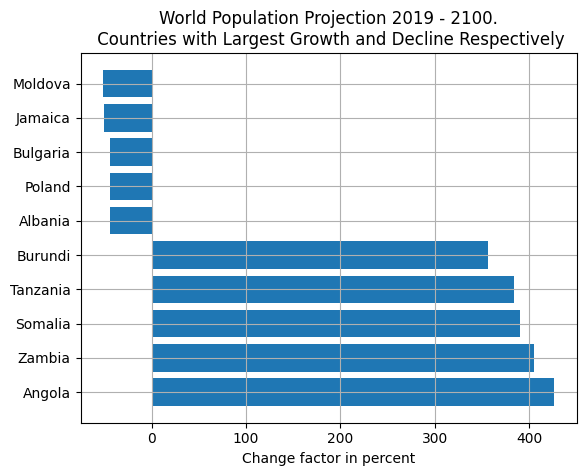

In [28]:
#run this cell whithout changes (you have not learned this tool yet)

# make a horisontal bar plot
import matplotlib.pyplot as plt

# save values for x and y 
countries = []
rel_change = []

for row in range(1, len(growth_percent)):
    #appending the country name value in position 0 
    countries.append(growth_percent[row][0])
    #appending the last value in the row (relative change)
    rel_change.append(growth_percent[row][-1])

plt.grid()
plt.barh(countries, rel_change)
plt.title('World Population Projection 2019 - 2100.\n Countries with Largest Growth and Decline Respectively')
plt.xlabel('Change factor in percent')
plt.show()

    You brought this to your stakeholders and they were very pleased! Great Work! However, their have been a last minute addition to the analysis...They also want to view for only European countries.

#### Stakeholder Request: Europe Subset

In [29]:


# create a list with European countries
europe = ['Russia', 'Germany', 'United Kingdom', 'France', 'Italy', 'Spain', 'Ukraine', 'Poland', 'Romania', 'Netherlands', 
          'Belgium', 'Czech Republic', 'Greece', 'Portugal', 'Sweden', 'Hungary', 'Belarus', 'Austria', 'Serbia', 
          'Switzerland', 'Bulgaria', 'Denmark', 'Finland', 'Slovak Republic','Norway', 'Ireland', 'Croatia', 'Moldova', 
          'Bosnia and Herzegovina', 'Albania',	'Lithuania','Macedonia, FYR', 'Slovenia', 'Latvia', 'Kosovo', 'Estonia', 
          'Montenegro', 'Luxembourg', 'Malta', 'Iceland', 'Andorra', 'Monaco', 'Liechtenstein', 'San Marino', 'Holy See']


In [30]:
# Define a new list, europe_list, and append only European Countries

europe_list = []

# find all countries in population_summary and add to europ_list

for row in range(1, len(population_summary)):
    if population_summary[row][0] in europe:
        europe_list.append(population_summary[row])

In [31]:
# sort list by percent change, highest to lowest
europe_list_srt = sorted(europe_list, reverse=True, key=lambda x: x[5])

In [32]:
# define new list, europe_growth, and append first and last 5 rows 
europe_growth = []

# append 5 first and 5 last from sorted list
for row in europe_list_srt[:6]:
    europe_growth.append(row)
for row in europe_list_srt[-5:]:
    europe_growth.append(row)

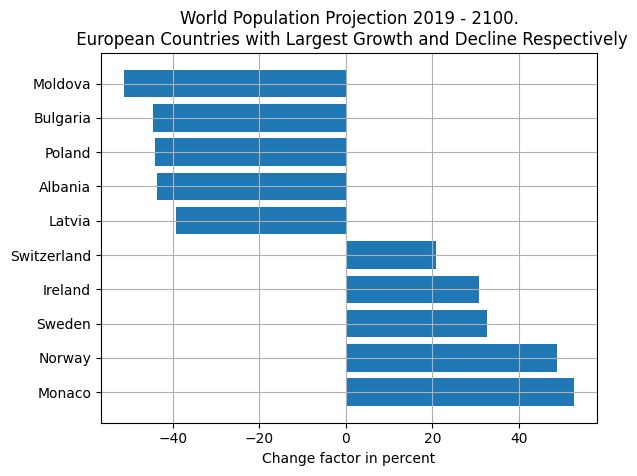

In [34]:
# run this cell whithout changes (you have not learned this tool yet)

# make a horisontal bar plot
import matplotlib.pyplot as plt

# save values for x and y 
europe_countries = []
europe_percent_change = []

for row in range(1, len(europe_growth)):
    #appending the country name value in position 0 
    europe_countries.append(europe_growth[row][0])
    #appending the last value in the row (relative change)
    europe_percent_change.append(europe_growth[row][-1])

plt.grid()
plt.barh(europe_countries, europe_percent_change)
plt.title('World Population Projection 2019 - 2100.\n European Countries with Largest Growth and Decline Respectively')
plt.xlabel('Change factor in percent')
plt.show()

    Congratulations! You brought this to your stakeholders and they were very pleased, great Work! However, yet again, there was a last minute addition to the analysis...they also want a comparison of projected population development between countries.

### Stakeholder Request: Projected population development between countries

In [35]:
# define new list, pop_norm, to add new values to

pop_norm = []



In [36]:
population_data

[['country',
  '2020',
  '2025',
  '2030',
  '2035',
  '2040',
  '2045',
  '2050',
  '2055',
  '2060',
  '2065',
  '2070',
  '2075',
  '2080',
  '2085',
  '2090',
  '2095',
  '2100'],
 ['Afghanistan',
  38054941,
  42388400,
  46699545,
  50907550,
  54914122,
  58614315,
  61928118,
  64833869,
  67307303,
  69312240,
  70828562,
  71835187,
  72324435,
  72356276,
  71993320,
  71316116,
  70409629],
 ['Albania',
  2942034,
  2946992,
  2933419,
  2895451,
  2833058,
  2753275,
  2663591,
  2570056,
  2473665,
  2373506,
  2268385,
  2159040,
  2048793,
  1940549,
  1837280,
  1741935,
  1657307],
 ['Algeria',
  43333255,
  46307643,
  48821963,
  51070401,
  53248997,
  55411769,
  57436703,
  59106493,
  60316226,
  61131159,
  61689919,
  62099469,
  62422851,
  62671784,
  62814647,
  62791869,
  62556472],
 ['Andorra',
  77184,
  77775,
  78154,
  78444,
  78550,
  78205,
  77187,
  75467,
  73261,
  70942,
  68854,
  67171,
  65955,
  65111,
  64451,
  63809,
  63125],
 ['Angol

In [37]:
# iterate through population data and add country names in single element lists

# add country
for row in range(len(population_data)):
    pop_norm.append([population_data[row][0]])
pop_norm

[['country'],
 ['Afghanistan'],
 ['Albania'],
 ['Algeria'],
 ['Andorra'],
 ['Angola'],
 ['Antigua and Barbuda'],
 ['Argentina'],
 ['Armenia'],
 ['Australia'],
 ['Austria'],
 ['Azerbaijan'],
 ['Bahamas'],
 ['Bahrain'],
 ['Bangladesh'],
 ['Barbados'],
 ['Belarus'],
 ['Belgium'],
 ['Belize'],
 ['Benin'],
 ['Bhutan'],
 ['Bolivia'],
 ['Bosnia and Herzegovina'],
 ['Botswana'],
 ['Brazil'],
 ['Brunei'],
 ['Bulgaria'],
 ['Burkina Faso'],
 ['Burundi'],
 ['Cambodia'],
 ['Cameroon'],
 ['Canada'],
 ['Cape Verde'],
 ['Central African Republic'],
 ['Chad'],
 ['Chile'],
 ['China'],
 ['Colombia'],
 ['Comoros'],
 ['Congo, Dem. Rep.'],
 ['Congo, Rep.'],
 ['Costa Rica'],
 ["Cote d'Ivoire"],
 ['Croatia'],
 ['Cuba'],
 ['Cyprus'],
 ['Czech Republic'],
 ['Denmark'],
 ['Djibouti'],
 ['Dominica'],
 ['Dominican Republic'],
 ['Ecuador'],
 ['Egypt'],
 ['El Salvador'],
 ['Equatorial Guinea'],
 ['Eritrea'],
 ['Estonia'],
 ['Ethiopia'],
 ['Fiji'],
 ['Finland'],
 ['France'],
 ['Gabon'],
 ['Gambia'],
 ['Georgia'],
 ['

### Normalizing Values Notes: 

    As some countries have large populations and some countries have small
    populations it is difficult to compare their population development. We can
    solve this by normalizing the population values (Scaling technique). We will do this by setting
    the year 2020 as an index year, and all other years will be presented in
    relation to this index year. The population of each year is divided by the
    population of the index year and multiplied by 100.

    https://www.economicsdiscussion.net/price/index-number/index-numbers-characteristics-formula-examples-types-importance-and-limitations/31211

![img](./image/norm_index_equation.png)

In [38]:
# add normalized values for each year, use 2020 as index year

for row_index in range(1,len(population_data)):
    for column_value in range(1, len(population_data[row_index])):
        pop_norm[row_index].append(round(population_data[row_index][column_value]/population_data[row_index][1]*100, 2))


In [39]:
pop_norm[0:5]

[['country'],
 ['Afghanistan',
  100.0,
  111.39,
  122.72,
  133.77,
  144.3,
  154.03,
  162.73,
  170.37,
  176.87,
  182.14,
  186.12,
  188.77,
  190.05,
  190.14,
  189.18,
  187.4,
  185.02],
 ['Albania',
  100.0,
  100.17,
  99.71,
  98.42,
  96.3,
  93.58,
  90.54,
  87.36,
  84.08,
  80.68,
  77.1,
  73.39,
  69.64,
  65.96,
  62.45,
  59.21,
  56.33],
 ['Algeria',
  100.0,
  106.86,
  112.67,
  117.85,
  122.88,
  127.87,
  132.55,
  136.4,
  139.19,
  141.07,
  142.36,
  143.31,
  144.05,
  144.63,
  144.96,
  144.9,
  144.36],
 ['Andorra',
  100.0,
  100.77,
  101.26,
  101.63,
  101.77,
  101.32,
  100.0,
  97.78,
  94.92,
  91.91,
  89.21,
  87.03,
  85.45,
  84.36,
  83.5,
  82.67,
  81.79]]

In [40]:
# add column names 
cols = ['country', '2020', '2025', '2030', '2035', '2040', '2045', '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090', '2095', '2100']

pop_norm[0] = cols

In [41]:
pop_norm[0:5]

[['country',
  '2020',
  '2025',
  '2030',
  '2035',
  '2040',
  '2045',
  '2050',
  '2055',
  '2060',
  '2065',
  '2070',
  '2075',
  '2080',
  '2085',
  '2090',
  '2095',
  '2100'],
 ['Afghanistan',
  100.0,
  111.39,
  122.72,
  133.77,
  144.3,
  154.03,
  162.73,
  170.37,
  176.87,
  182.14,
  186.12,
  188.77,
  190.05,
  190.14,
  189.18,
  187.4,
  185.02],
 ['Albania',
  100.0,
  100.17,
  99.71,
  98.42,
  96.3,
  93.58,
  90.54,
  87.36,
  84.08,
  80.68,
  77.1,
  73.39,
  69.64,
  65.96,
  62.45,
  59.21,
  56.33],
 ['Algeria',
  100.0,
  106.86,
  112.67,
  117.85,
  122.88,
  127.87,
  132.55,
  136.4,
  139.19,
  141.07,
  142.36,
  143.31,
  144.05,
  144.63,
  144.96,
  144.9,
  144.36],
 ['Andorra',
  100.0,
  100.77,
  101.26,
  101.63,
  101.77,
  101.32,
  100.0,
  97.78,
  94.92,
  91.91,
  89.21,
  87.03,
  85.45,
  84.36,
  83.5,
  82.67,
  81.79]]

In [42]:
#print first five rows

for row in pop_norm[:5]:
    print(row)

['country', '2020', '2025', '2030', '2035', '2040', '2045', '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090', '2095', '2100']
['Afghanistan', 100.0, 111.39, 122.72, 133.77, 144.3, 154.03, 162.73, 170.37, 176.87, 182.14, 186.12, 188.77, 190.05, 190.14, 189.18, 187.4, 185.02]
['Albania', 100.0, 100.17, 99.71, 98.42, 96.3, 93.58, 90.54, 87.36, 84.08, 80.68, 77.1, 73.39, 69.64, 65.96, 62.45, 59.21, 56.33]
['Algeria', 100.0, 106.86, 112.67, 117.85, 122.88, 127.87, 132.55, 136.4, 139.19, 141.07, 142.36, 143.31, 144.05, 144.63, 144.96, 144.9, 144.36]
['Andorra', 100.0, 100.77, 101.26, 101.63, 101.77, 101.32, 100.0, 97.78, 94.92, 91.91, 89.21, 87.03, 85.45, 84.36, 83.5, 82.67, 81.79]


In [43]:
# sort the list into a new list called pop_norm_sorted

pop_norm_sorted = sorted(pop_norm[1:], reverse=True, key=lambda x: x[-1])

In [44]:

# define new list, population_development, and append first and last 5 rows

population_development = []

# append 5 first and 5 last from sorted list
for row in pop_norm_sorted[:6]:
    population_development.append(row)
for row in pop_norm_sorted[-5:]:
    population_development.append(row)

C:\Users\fredv\AppData\Local\Temp\ipykernel_32072\2963809106.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(y_tick_labels)


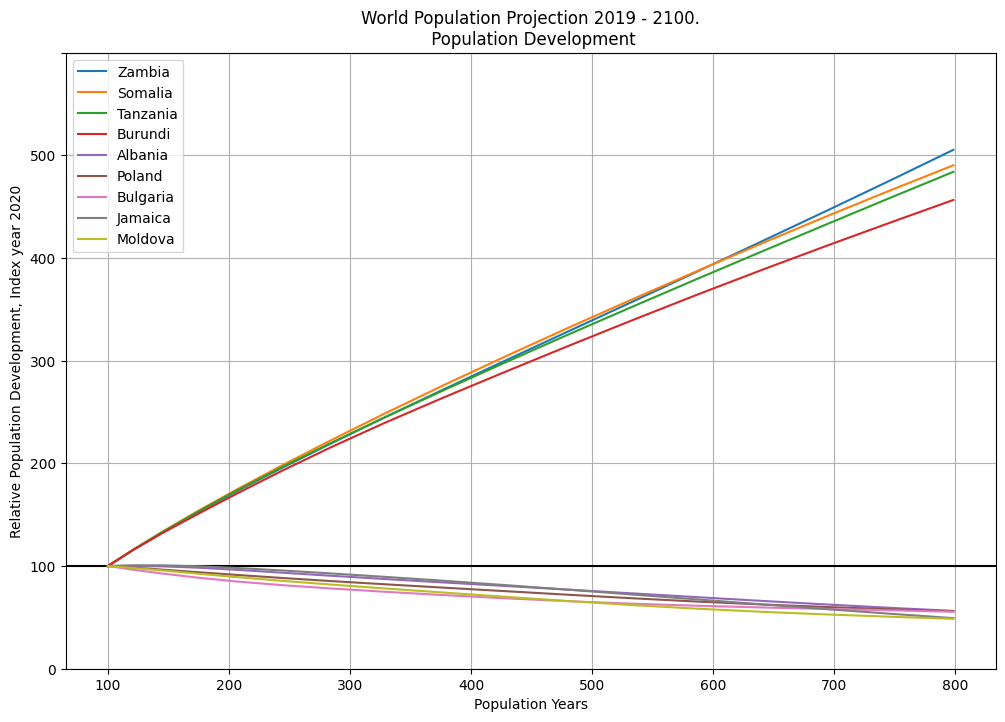

In [45]:
# run this cell without changes 

fig,ax = plt.subplots()

for i in range(2, len(population_development)):
    ax.plot(population_development[0][1:],
            population_development[i][1:],
            label = population_development[i][0])

fig.set_figwidth(12)
fig.set_figheight(8)

plt.grid()

plt.legend()
plt.title('World Population Projection 2019 - 2100.\n Population Development')
plt.xlabel('Population Years')
plt.ylabel('Relative Population Development, Index year 2020')
plt.ylim(0,600)
plt.yscale('linear')
y_tick_labels = [0, 100, 200, 300, 400, 500]
ax.set_yticklabels(y_tick_labels)
ind = y_tick_labels.index(100)

gridlines = ax.yaxis.get_gridlines()
gridlines[ind].set_color("k")
gridlines[ind].set_linewidth(1.5)

plt.show()


    Congratulations...Again! You brought this additional analysis to your stakeholders and they were very pleased, great work! However, as predicted, there was a last minute addition to the analysis...they also want a comparison of projected population development between a specific list of countries that was provided to you.

### Stakeholder Request: Population Development Subset

In [46]:
pop_dev_subset_list= ['Australia', 'Japan', 'Moldova', 'Sweden', 'United Kingdom', 'United States']

In [47]:
#define a new list pop_dev_subset and add values from pop_norm only if in pop_dev_subset_list


pop_dev_subset = []

for i in pop_norm[1:]:
    if i[0] in pop_dev_subset_list:
        pop_dev_subset.append(i)

In [48]:
# add column names
cols = ['country', '2020', '2025', '2030', '2035', '2040', '2045', '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090', '2095', '2100']
pop_dev_subset.insert(1, cols)

    Congrats...For real this time! There were no more last minute additions. You are finished! 